In [102]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [103]:
df = pd.read_csv('avgIQpercountry.csv')
df.head()

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,10143543
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1425671352


In [104]:
world = gpd.read_file('ne_110m_admin_0_countries.shp')

In [105]:
merged_data = world.merge(df, left_on='ADMIN', right_on='Country', how='left')
merged_data = merged_data[~merged_data['Average IQ'].isnull()]

In [106]:
merged_data.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,89.0,Fiji,83.96,Oceania,0.94,0.0,0.730,10.9,9980.0,936.375
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,144.0,United Republic of Tanzania,74.95,Africa,0.80,1.0,0.549,6.4,2664.0,67438106
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,16.0,Canada,99.52,North America,0.99,28.0,0.936,13.8,46808.0,38781292
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,28.0,United States of America,97.43,North America,0.99,400.0,0.921,13.7,64765.0,339996564
5,Admin-0 country,1,3,Kazakhstan,KA1,1,1,Sovereignty,1,Kazakhstan,...,63.0,Kazakhstan,88.89,Asia,1.00,0.0,0.811,12.3,23943.0,19606634


In [112]:
vmin = df['Average IQ'].min()  # Minimum IQ
vmax = df['Average IQ'].max()  # Maximum IQ
cmap = plt.get_cmap('RdYlGn')

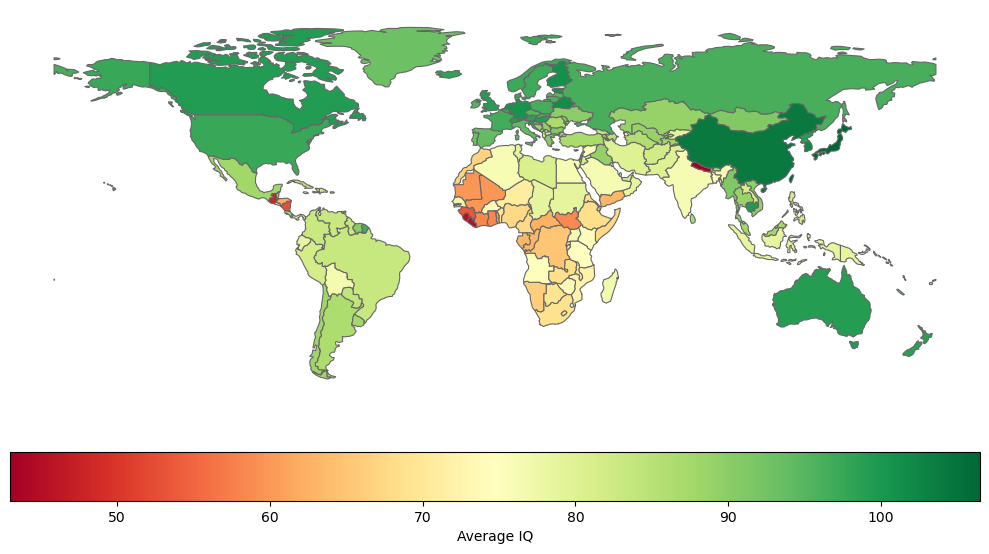

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data.plot(column='Average IQ', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.4', legend=False)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1)
cbar.set_label('Average IQ')
ax.set_axis_off()

plt.tight_layout()
plt.show()

In [115]:
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Ensure 'merged_data' is your GeoDataFrame and contains the necessary columns
# Example data preparation
# Check if 'Average IQ' column exists and is not empty
if 'Average IQ' not in merged_data.columns:
    raise ValueError("Column 'Average IQ' does not exist in the GeoDataFrame.")

# Ensure no missing values in 'Average IQ'
if merged_data['Average IQ'].isnull().any():
    raise ValueError("Column 'Average IQ' contains missing values.")

# Define color map and normalization
vmin = merged_data['Average IQ'].min()
vmax = merged_data['Average IQ'].max()

# Debugging output
print(f"vmin: {vmin}, vmax: {vmax}")

norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# Function to apply color based on IQ
def color_function(iq):
    # Ensure that the IQ value is not None and normalize properly
    if iq is None:
        return '#FFFFFF'  # Default color for missing values
    return mcolors.to_hex(cmap(norm(iq)))

# Initialize the map
m = folium.Map(location=[20, 0], zoom_start=2)

# Define a function to format the popup text
def get_popup(feature):
    iq = feature['properties'].get('Average IQ', 'N/A')
    rank = feature['properties'].get('Rank', 'N/A')
    literacy_rate = feature['properties'].get('Literacy Rate', 'N/A')
    population = feature['properties'].get('Population', 'N/A')
    return f"IQ: {iq}<br>Rank: {rank}<br>Literacy Rate: {literacy_rate}%<br>Population: {population}"

# Add GeoJson layer with popups and color function
folium.GeoJson(
    merged_data,
    style_function=lambda feature: {
        'fillColor': color_function(feature['properties'].get('Average IQ', 0)),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7
    },
    popup=folium.GeoJsonPopup(
        fields=['Country', 'Average IQ', 'Rank', 'Literacy Rate', 'Population'],
        aliases=['Country:', 'IQ:', 'Rank:', 'Literacy Rate:', 'Population:'],
        localize=True,
        sticky=True,
        labels=True
    )
).add_to(m)

bounds = [[-60, -180], [85, 180]]  # Example bounds (latitude, longitude)

# Add a tile layer with no dragging
folium.TileLayer(
    'cartodb positron',
    max_zoom=10, 
    min_zoom=2,
    overlay=False,
    control=False
).add_to(m)

# Add a layer control and display the map
folium.LayerControl().add_to(m)


m

vmin: 42.99, vmax: 106.48


In [87]:
merged_data['Average IQ'].isnull().any()

True

In [88]:
missing_values_df = merged_data[merged_data['Average IQ'].isnull()]


In [89]:
missing_values_df

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Admin-0 country,1,4,The Bahamas,BHS,0,2,Sovereign country,1,The Bahamas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Admin-0 country,1,5,United Kingdom,GB1,1,2,Disputed,1,Falkland Islands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Admin-0 country,3,6,France,FR1,1,2,Dependency,1,French Southern and Antarctic Lands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Admin-0 country,1,6,Guinea-Bissau,GNB,0,2,Sovereign country,1,Guinea-Bissau,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Admin-0 country,1,4,Equatorial Guinea,GNQ,0,2,Sovereign country,1,Equatorial Guinea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,Admin-0 country,1,4,eSwatini,SWZ,0,2,Sovereign country,1,eSwatini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Admin-0 country,1,6,Moldova,MDA,0,2,Sovereign country,1,Moldova,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Admin-0 country,1,4,Antarctica,ATA,0,2,Indeterminate,1,Antarctica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,Admin-0 country,1,6,Northern Cyprus,CYN,0,2,Sovereign country,1,Northern Cyprus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
missing_values_df.to_csv('sdsfd.csv', index=False)

In [96]:
merged_data

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,90.0,Fiji,83.96,Oceania,0.94,0.0,0.730,10.9,9980.0,936.375
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,145.0,United Republic of Tanzania,74.95,Africa,0.80,1.0,0.549,6.4,2664.0,67438106
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,16.0,Canada,99.52,North America,0.99,28.0,0.936,13.8,46808.0,38781292
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,28.0,United States of America,97.43,North America,0.99,400.0,0.921,13.7,64765.0,339996564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,83.0,Montenegro,85.78,Europe,0.99,0.0,0.832,12.2,20839.0,626.485
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,84.0,Trinidad and Tobago,85.63,Central America,0.99,1.0,0.810,11.6,23392.0,1534937
